## Importing & Pre Processing

In [1]:
# 0) Imports + style
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path

# point Python at the ./code folder
project = Path.cwd()
sys.path.insert(0, str(project / "code"))

CSV_ROOT = Path("input/experimental_input")

outPath = Path("output-5.02")
outPath.mkdir(exist_ok=True, parents=True)

from combine_module import (
    Combiner, Y_WINDOWS_3, PT_BINS_2P5,
    COMP_COLORS, STATE_COLORS, PRETTY_STATE, BAND_ALPHA
)

In [ ]:
# Paths 5 TeV pPb
ELOSS_5TEV = "/home/sawin/Desktop/Charmonia/combined_data_analysis/input/eloss/pPb5TeV"
NPDF_5TEV  = "./input/npdf/pPb5TeV"
PRIM_BASE_5TEV_NPWLC = "./input/primordial/pPb5TeV/output_5pPb_Tf170_NPWLC"
PRIM_BASE_5TEV_Pert = "./input/primordial/pPb5TeV/output_5pPb_Tf170_Pert"
GLAUBER_5TEV   = "./input/glauber_data/5TeV"
# Paths 8 TeV pPb
ELOSS_8TEV = "/home/sawin/Desktop/Charmonia/combined_data_analysis/input/eloss/pPb8TeV"
NPDF_8TEV  = "./input/npdf/pPb8TeV"
PRIM_BASE_8TEV_NPWLC = "./input/primordial/pPb8TeV/output_8pPb_Tf170_NPWLC"
PRIM_BASE_8TEV_Pert = "./input/primordial/pPb8TeV/output_8pPb_Tf170_Pert"
GLAUBER_8TEV   = "./input/glauber_data/8TeV"

C5NPWLC = Combiner(
    tag="5.02",
    e_loss_base=ELOSS_5TEV,
    npdf_folder=NPDF_5TEV,
    prim_base=PRIM_BASE_5TEV_NPWLC,
    glauber_root=GLAUBER_5TEV,
    sigmaNN_mb=67.0,
    sqrt_sNN_GeV=5020.0,
)

C5 = Combiner(
    tag="5.02",
    e_loss_base=ELOSS_5TEV,
    npdf_folder=NPDF_5TEV,
    prim_base=PRIM_BASE_5TEV_Pert,
    glauber_root=GLAUBER_5TEV,
    sigmaNN_mb=67.0,
    sqrt_sNN_GeV=5020.0,
)

# C8NPWLC = Combiner(
#     tag="8.16",
#     e_loss_base=ELOSS_8TEV,
#     npdf_folder=NPDF_8TEV,
#     prim_base=PRIM_BASE_8TEV_NPWLC,
#     glauber_root=GLAUBER_8TEV,
#     sigmaNN_mb=71.0,
#     sqrt_sNN_GeV=8160.0,
# )
# C8Pert = Combiner(
#     tag="8.16",
#     e_loss_base=ELOSS_8TEV,
#     npdf_folder=NPDF_8TEV,
#     prim_base=PRIM_BASE_8TEV_Pert,
#     glauber_root=GLAUBER_8TEV,
#     sigmaNN_mb=71.0,
#     sqrt_sNN_GeV=8160.0,
# )

[INFO] Loaded 0-20
[INFO] Loaded 20-40
[INFO] Loaded 40-60
[INFO] Loaded 60-100
[INFO] Loaded 0-20
[INFO] Loaded 20-40
[INFO] Loaded 40-60
[INFO] Loaded 60-100
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7c15fbac2f90>>
Traceback (most recent call last):
  File "/home/sawin/anaconda3/envs/research/lib/python3.13/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [ ]:
# ----------------------------- constants -----------------------------
CENT_EDGES_ELOSS = [0, 20, 40, 60, 100]                       # match eLoss bins
Y_WINDOWS_3      = [(-1.93, 1.93), (1.5, 4.0), (-5.0, -2.5)]  # mid, fwd, bwd
PT_BINS_2P5      = [(i, i+2.5) for i in np.arange(0.0, 20.0, 2.5)]

In [ ]:
# you can override here as well:
STATE_COLORS.update({
    "jpsi_1S":  "#8c564b",
    "psi_2S":   "#e377c2",
    "chicJ_1P": "#17becf",
})

## $R_{pA}$ vs Centrality

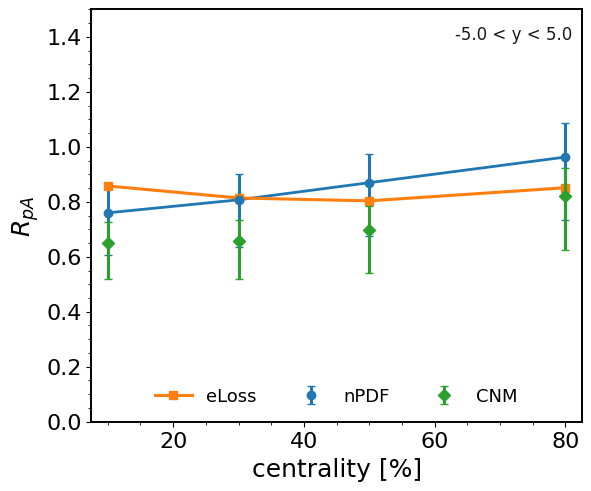

In [ ]:
# --- A. CNM-only-style comparison (components selectable) ---
C5.figure_result_vs_centrality(
    y_windows=[(-5,5)],
    pt_range=(0.0, 20.0),
    components=("nPDF", "eLoss", "CNM"),
    save_pdf=f"{outPath}/fig_CNM_vs_centrality_5TeV.pdf",
    legend_mode="figure",
    legend_loc="lower center",
    ylim=(0.0, 1.5),
    xticks=(20, 40, 60, 80),
    ncols=1,               # columns for subplots
    minor_ticks=True,
    note_loc="upper right"
)

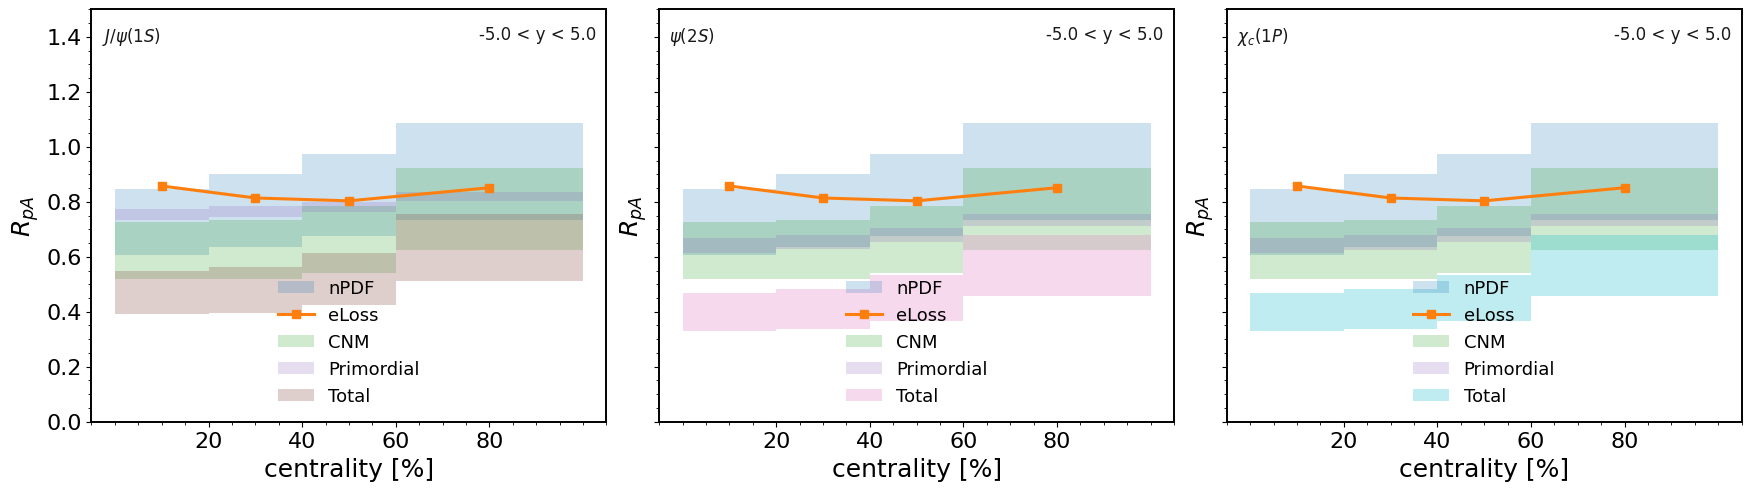

In [ ]:
# A) Single flexible centrality figure (choose WHAT to show)
C5.figure_result_vs_centrality_by_state(
    y_windows=[(-5, 5)],
    pt_range=(0.0, 20.0),
    states=["jpsi_1S", "psi_2S", "chicJ_1P"],
    components=("nPDF", "eLoss", "CNM", "Primordial", "Total"),
    legend_mode="each",            # each panel has the 5-entry legend
    legend_loc="lower center",
    ncols=3,                       # 1 column of y-windows → 3 rows (states)
    ylim=(0.0, 1.5),
    xticks=(20, 40, 60, 80),
    note_loc="upper right",
    save_pdf=f"{outPath}/fig_centrality_by_state_5TeV.pdf",
)

## $R_{pA}$ vs Rapidity ($y$)

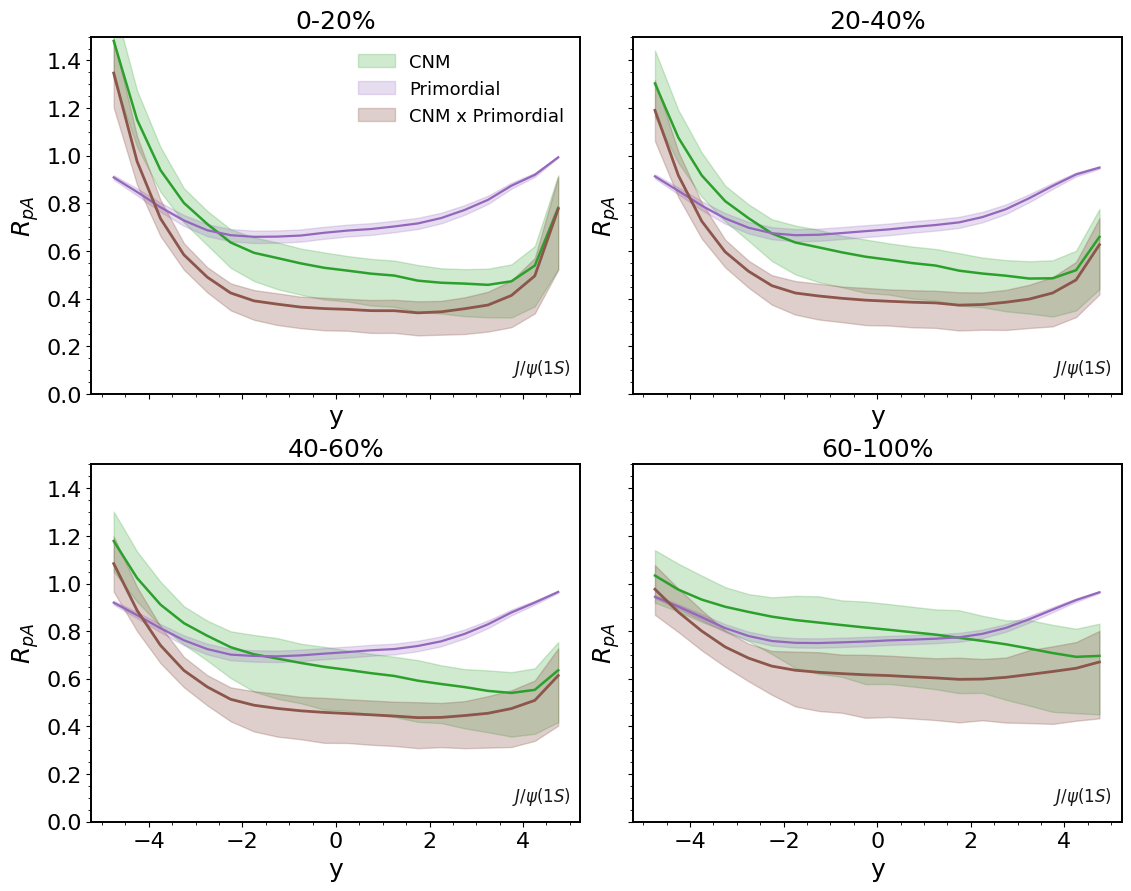

In [ ]:
# --- C. Total vs y, one panel per centrality, per state ---
C5.figure_total_vs_y_per_centrality(
    pt_range=(0.0, 20.0),
    states=["jpsi_1S"],
    save_pdf_prefix=f"{outPath}/fig_Total_vs_y_bycent_5TeV_1S",
    legend_mode="panel-first",
    legend_loc="best",
    ylim=(0.0, 1.5),
    ncols=2,
    minor_ticks=True,
    note_loc="lower right"
)

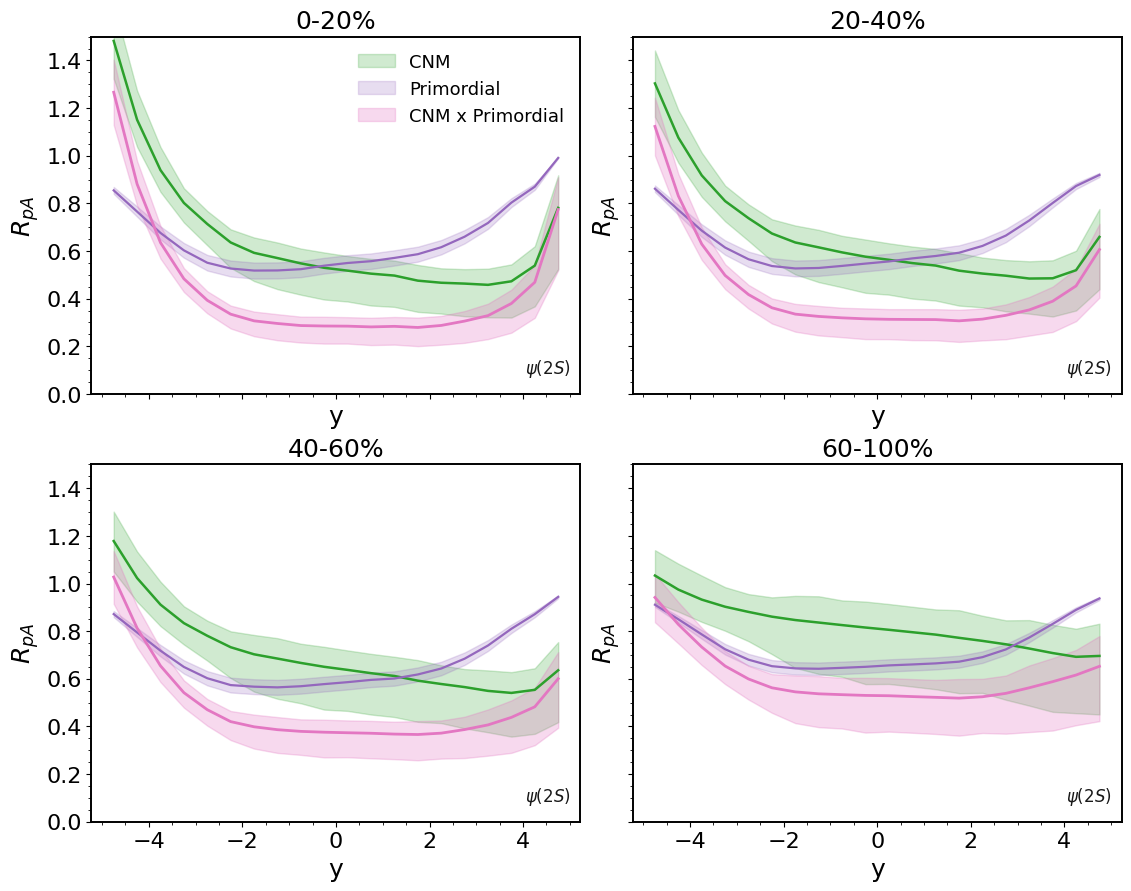

In [ ]:
# --- C. Total vs y, one panel per centrality, per state ---
C5.figure_total_vs_y_per_centrality(
    pt_range=(0.0, 20.0),
    states=["psi_2S"],
    save_pdf_prefix=f"{outPath}/fig_Total_vs_y_bycent_5TeV_2S",
    legend_mode="panel-first",
    legend_loc="best",
    ylim=(0.0, 1.5),
    ncols=2,
    minor_ticks=True,
    note_loc="lower right"
)

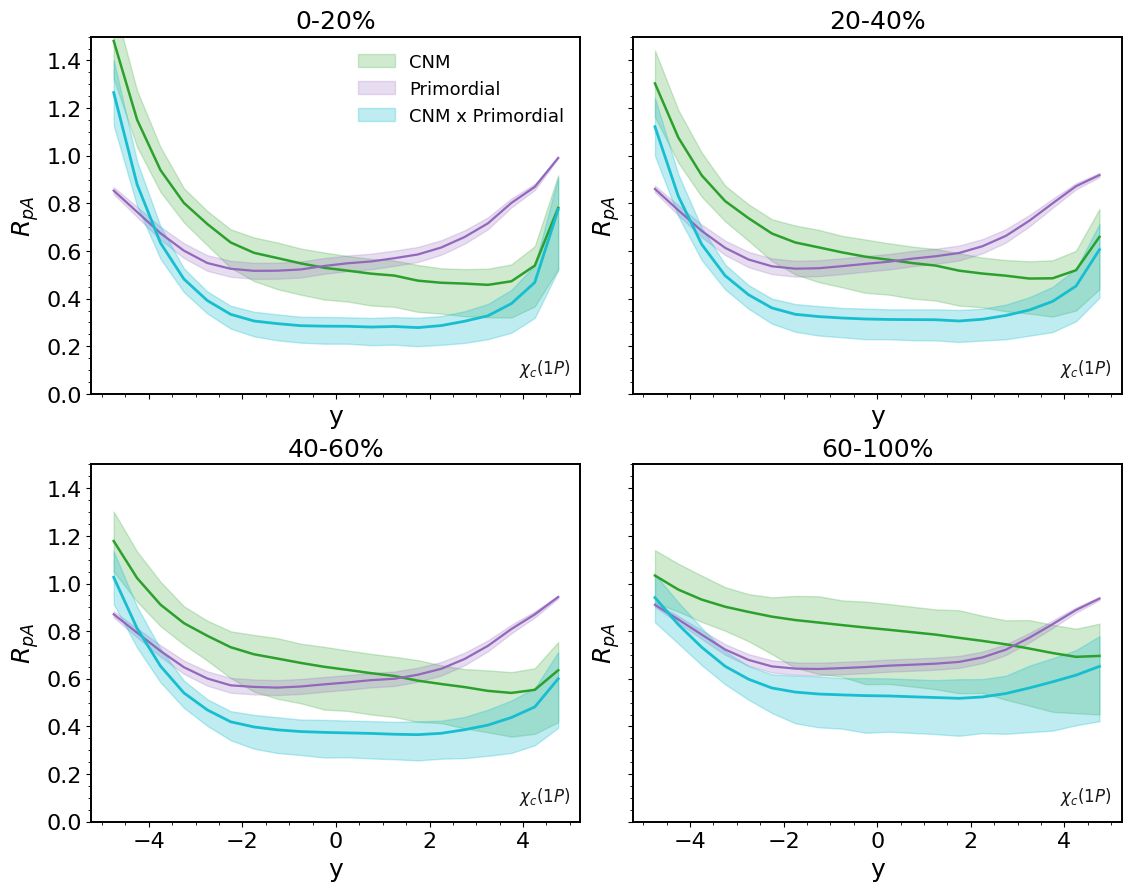

In [ ]:
# --- C. Total vs y, one panel per centrality, per state ---
C5.figure_total_vs_y_per_centrality(
    pt_range=(0.0, 20.0),
    states=["chicJ_1P"],
    save_pdf_prefix=f"{outPath}/fig_Total_vs_y_bycent_5TeV_1P",
    legend_mode="panel-first",
    legend_loc="best",
    ylim=(0.0, 1.5),
    ncols=2,
    minor_ticks=True,
    note_loc="lower right"
)

## $R_{pA}$ vs Transverse Momentum

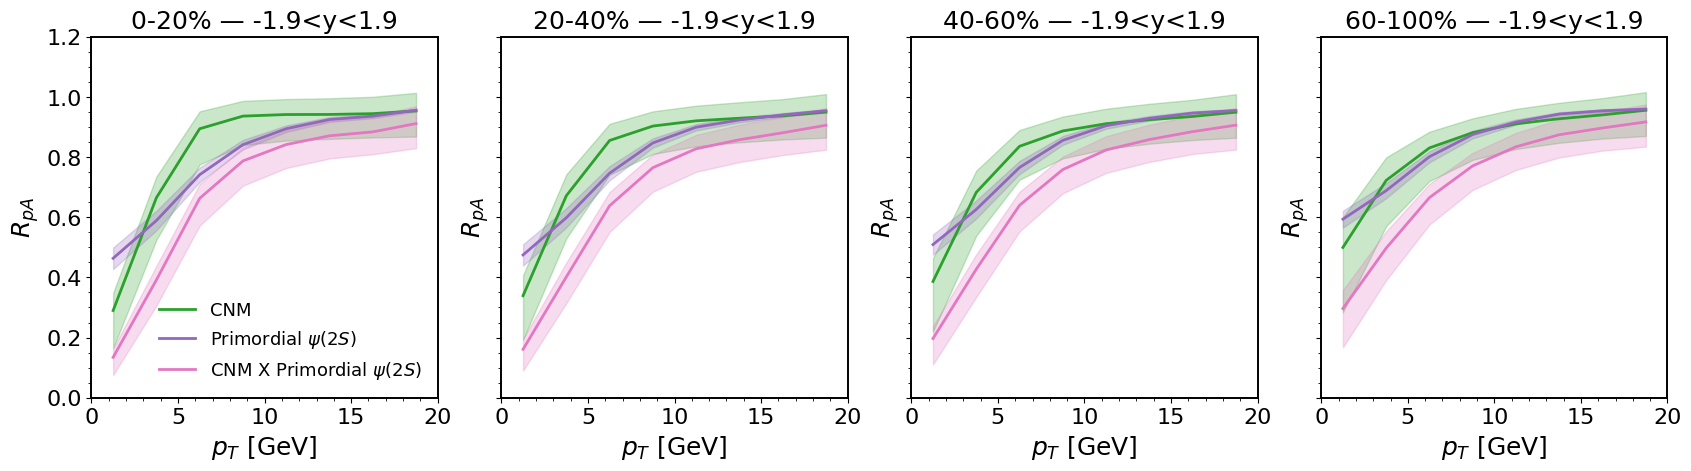

In [ ]:
# --- D. Total vs pT, arbitrary number of rapidity windows (works with a SINGLE window too) ---
# (1) Single rapidity window -> exactly one panel per centrality (no IndexError)
C5.figure_total_vs_pt_per_centrality(
    y_windows=[(-1.93, 1.93)],
    pt_bins=PT_BINS_2P5,
    states=["psi_2S"],  # the label color comes from STATE_COLORS
    save_pdf_prefix=f"{outPath}/fig_Total_vs_pt_bycent_5TeV_mid",
    legend_mode="panel-first",
    legend_loc="best",
    ylim=(0.0, 1.2),
    xlim=(0.0, 20.0),
    minor_ticks=True,
    note_loc="lower right",
)

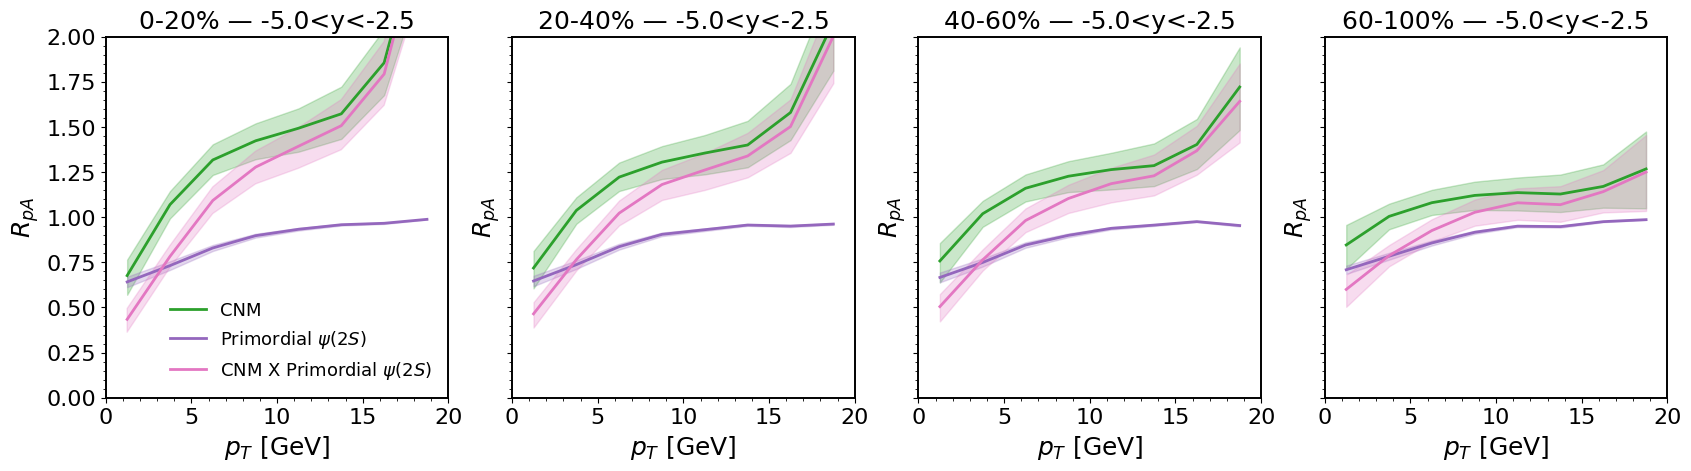

In [ ]:
# (2) Three windows -> 3 panels per centrality, natural order
C5.figure_total_vs_pt_per_centrality(
    y_windows=[(-5.0,-2.5)],
    pt_bins=PT_BINS_2P5,
    states=["psi_2S"],
    save_pdf_prefix=f"{outPath}/fig_Total_vs_pt_bycent_5TeV_backward",
    legend_mode="panel-first",
    legend_loc="best",
    ylim=(0.0, 2.0),
    xlim=(0.0, 20.0),
    minor_ticks=True,
    note_loc="lower right"
)

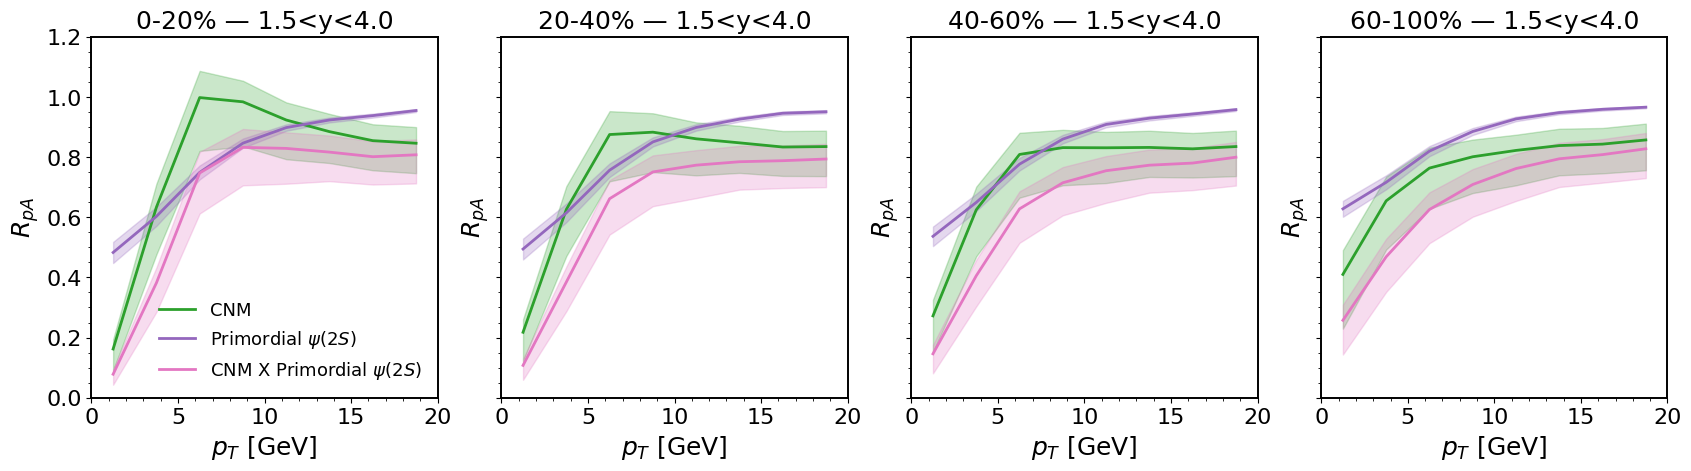

In [ ]:
# (2) Three windows -> 3 panels per centrality, natural order
C5.figure_total_vs_pt_per_centrality(
    y_windows=[(1.5, 4.0)],
    pt_bins=PT_BINS_2P5,
    states=["psi_2S"],
    save_pdf_prefix=f"{outPath}/fig_Total_vs_pt_bycent_5TeV_forward",
    legend_mode="panel-first",
    legend_loc="best",
    ylim=(0.0, 1.2),
    xlim=(0.0, 20.0),
    minor_ticks=True,
    note_loc="lower right"
)

<!-- ## $R_{pA}$ vs $y$ and $p_T$ (Centrality Integrated) -->

## $R_{pA}$ vs $y$ and $p_T$ (Centrality Integrated)

### Experimental Data

In [ ]:
# ========================== EXP. DATA LOADING (FINAL) ==========================
from pathlib import Path
import pandas as pd, numpy as np, re
import csv
CSV_ROOT  = Path("input/experimental_input")
Y_BWD     = (-4.46, -2.96)
Y_MID     = (-1.37, -0.43)
Y_FWD     = ( 2.03,  3.53)
Y_WINDOWS = [Y_BWD, Y_MID, Y_FWD]

# ---------- helpers ----------
def _to_num(s): return pd.to_numeric(s, errors="coerce")

def _csvsplit(line: str):
    # parses a single CSV line correctly (quotes, commas inside quotes, spaces)
    return next(csv.reader([line], skipinitialspace=True))

def _symmetrize_cols(p, m):
    if p is None and m is None: return 0.0
    if p is None: p = pd.Series([np.nan]*len(m), index=m.index)
    if m is None: m = pd.Series([np.nan]*len(p), index=p.index)
    p = _to_num(p).fillna(0.0).abs(); m = _to_num(m).fillna(0.0).abs()
    return 0.5*(p + m).to_numpy()

def _combine_quadrature_arrays(arrs):
    parts = [np.asarray(a, float) for a in arrs if a is not None]
    if not parts: return 0.0
    return np.sqrt((np.vstack(parts)**2).sum(axis=0))

def _parse_y_range(line):
    m = re.findall(r'(-?\d+(?:\.\d+)?)\s*-\s*(-?\d+(?:\.\d+)?)', line)
    if not m: return (np.nan, np.nan)
    a,b = m[-1]; return float(a), float(b)

def _guess_state_from_text(line):
    t = line.lower()
    # accept several ways the file may mention the states
    if ("psi(2s)" in t) or ("psi 2s" in t) or ("psip" in t):
        return "psi_2S"
    if ("j/psi" in t) or ("jpsi" in t):
        return "jpsi_1S"
    return None

def _table_to_frame(header, rows, *, experiment, state, ylo, yhi, is_double_ratio=False):
    df   = pd.DataFrame(rows, columns=header); cols = list(df.columns)
    def has(sub):
        for c in cols:
            if sub.lower() in c.lower(): return c
        return None

    col_ptlo = has("pt_low") or has("pt [gev] low")
    col_pthi = has("pt_high") or has("pt [gev] high")
    if col_ptlo is None or col_pthi is None:
        raise ValueError("pt-low/high columns not found: " + ", ".join(cols))

    if is_double_ratio:
        col_val = has("sigma")
    else:
        col_val = has("rpa") or next((c for c in cols if re.search(r"r.*p.*a", c.lower())), None)
    if col_val is None:
        raise ValueError("value column (RpA/sigma) not found: " + ", ".join(cols))

    col_stat_p = has("stat +") or has("stat_uncertainty +") or has("stat_uncertainty")
    col_stat_m = has("stat -")

    sys_groups = [
        ("sys,correl", has("sys,correl +"), has("sys,correl -")),
        ("sys,uncorr", has("sys,uncorr +"), has("sys,uncorr -")),
        ("sys,global", has("sys,global +"), has("sys,global -")),
        ("sys_1", has("sys_1 +"), has("sys_1 -")),
        ("sys_2", has("sys_2 +"), has("sys_2 -")),
        ("sys_3", has("sys_3 +"), has("sys_3 -")),
        ("sys_correlated_uncertainty", has("sys_correlated_uncertainty"), None),
        ("sys_uncorrelated_uncertainty", has("sys_uncorrelated_uncertainty"), None),
    ]

    for c in [col_ptlo, col_pthi, col_val, col_stat_p, col_stat_m]:
        if c is not None: df[c] = _to_num(df[c])
    for _, cp, cm in sys_groups:
        for c in (cp, cm):
            if c is not None: df[c] = _to_num(df[c])

    ptlo = _to_num(df[col_ptlo]).to_numpy()
    pthi = _to_num(df[col_pthi]).to_numpy()
    pt   = 0.5*(ptlo + pthi)
    val  = _to_num(df[col_val]).to_numpy()
    stat = _symmetrize_cols(df[col_stat_p] if col_stat_p else None,
                            df[col_stat_m] if col_stat_m else None)

    dglob = np.zeros_like(val, float)
    sys_non_global = []
    for name, cp, cm in sys_groups:
        if cp is None and cm is None: continue
        sym = _symmetrize_cols(df[cp] if cp else None, df[cm] if cm else None)
        if name.lower().startswith("sys,global"):
            dglob = sym
        else:
            sys_non_global.append(sym)

    dtot = _combine_quadrature_arrays([stat] + sys_non_global)

    return pd.DataFrame({
        "experiment": experiment,
        "state": state,
        "ylo": float(ylo) if np.isfinite(ylo) else np.nan,
        "yhi": float(yhi) if np.isfinite(yhi) else np.nan,
        "pt": pt, "ptlo": ptlo, "pthi": pthi,
        "val": val, "dtot": dtot, "dglob": dglob,
    })

# --- RpA(pT): multiple tables (J/ψ bwd/mid/fwd + ψ(2S) fwd) ---
def load_exp_rpa_vs_pt_tidy(csv_path: str | Path, *, experiment="ALICE") -> pd.DataFrame:
    lines = [ln.strip() for ln in open(csv_path, "r", encoding="utf-8").readlines()]
    cur_state, (ylo, yhi) = None, (np.nan, np.nan)

    # NEW: per-table snapshot (prevents "state bleed-over" across tables)
    block_state, block_ylo, block_yhi = None, np.nan, np.nan

    frames, header, rows = [], None, []

    def flush():
        nonlocal frames, header, rows, block_state, block_ylo, block_yhi
        if header is None or len(rows) == 0:
            header = rows = None
            return
        frames.append(_table_to_frame(
            header, rows,
            experiment=experiment,
            # use the snapshot if we have it; otherwise fall back to current
            state=block_state or cur_state or "UNKNOWN",
            ylo=(block_ylo if np.isfinite(block_ylo) else ylo),
            yhi=(block_yhi if np.isfinite(block_yhi) else yhi),
            is_double_ratio=False
        ))
        header = rows = None
        block_state, block_ylo, block_yhi = None, np.nan, np.nan  # reset snapshot

    for ln in lines:
        if (not ln) or ln.startswith("#") or ln.startswith("#:"):
            st = _guess_state_from_text(ln)
            if st: cur_state = st
            if "YRAP" in ln.upper(): ylo, yhi = _parse_y_range(ln)
            continue

        parts = _csvsplit(ln)
        if any(k in ln for k in ["PT [GEV]", "pT_low", "pT_high"]):
            flush()
            header = parts; rows = []
            # snapshot the state/y **at header time**
            block_state, block_ylo, block_yhi = cur_state, ylo, yhi
        elif header is not None and len(parts) == len(header):
            rows.append(parts)
        else:
            flush()
    flush()

    return (pd.concat(frames, ignore_index=True)
            if frames else pd.DataFrame(columns="experiment state ylo yhi pt ptlo pthi val dtot dglob".split()))

def load_exp_double_ratio_vs_pt_tidy(csv_path: str | Path, *, experiment="ALICE") -> pd.DataFrame:
    lines = [ln.strip() for ln in open(csv_path, "r", encoding="utf-8").readlines()]
    cur_state, (ylo, yhi) = "psi_2S_over_jpsi_1S", (np.nan, np.nan)

    # NEW snapshot
    block_state, block_ylo, block_yhi = cur_state, np.nan, np.nan

    frames, header, rows = [], None, []

    def flush():
        nonlocal frames, header, rows, block_state, block_ylo, block_yhi
        if header is None or len(rows) == 0:
            header = rows = None
            return
        frames.append(_table_to_frame(
            header, rows,
            experiment=experiment,
            state=block_state,                                 # keep fixed to DR state
            ylo=(block_ylo if np.isfinite(block_ylo) else ylo),
            yhi=(block_yhi if np.isfinite(block_yhi) else yhi),
            is_double_ratio=True
        ))
        header = rows = None
        block_state, block_ylo, block_yhi = cur_state, np.nan, np.nan

    for ln in lines:
        if (not ln) or ln.startswith("#") or ln.startswith("#:"):
            if "YRAP" in ln.upper(): ylo, yhi = _parse_y_range(ln)
            continue  # DON'T override state for DR
        parts = _csvsplit(ln)
        if any(k in ln for k in ["pT_low", "pT_high"]):
            flush()
            header = parts; rows = []
            block_state, block_ylo, block_yhi = cur_state, ylo, yhi  # snapshot
        elif header is not None and len(parts) == len(header):
            rows.append(parts)
        else:
            flush()
    flush()

    return (pd.concat(frames, ignore_index=True)
            if frames else pd.DataFrame(columns="experiment state ylo yhi pt ptlo pthi val dtot dglob".split()))

# --- rapidity housekeeping / tolerant selection --------------------------------
def _fill_missing_ywindows_per_state(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    for st, g in df.groupby("state"):
        ref = g.loc[g["ylo"].notna() & g["yhi"].notna(), ["ylo","yhi"]]
        if not ref.empty:
            ylo, yhi = map(float, ref.iloc[0])
            mask = (df["state"]==st) & (~np.isfinite(df["ylo"]) | ~np.isfinite(df["yhi"]))
            df.loc[mask, ["ylo","yhi"]] = (ylo, yhi)
    return df

def select_exp_by_ywindow(df: pd.DataFrame, state: str, y_window, tol=5e-3) -> pd.DataFrame:
    """Tolerant match; if y-window is missing in the file, fall back to state-only."""
    ylo, yhi = y_window
    sub = df.query("state==@state and abs(ylo-@ylo)<@tol and abs(yhi-@yhi)<@tol")
    if not sub.empty: return sub
    return df.query("state==@state and (ylo!=ylo or yhi!=yhi)")  # NaN y-window rows

In [ ]:
# Load tables
exp_rpa = load_exp_rpa_vs_pt_tidy(CSV_ROOT/"5TeVpPb"/"vs_pt"/"rpa_vs_pt.csv", experiment="ALICE")
exp_dr  = load_exp_double_ratio_vs_pt_tidy(CSV_ROOT/"5TeVpPb"/"vs_pt"/"double_ratios_vs_pt.csv", experiment="ALICE")
exp_rpa = _fill_missing_ywindows_per_state(exp_rpa)
exp_dr  = _fill_missing_ywindows_per_state(exp_dr)
print("Loaded ALICE: RpA rows =", len(exp_rpa), "| DR rows =", len(exp_dr))

Loaded ALICE: RpA rows = 23 | DR rows = 4


In [ ]:
# =============================== USAGE & PLOTS ===============================
import numpy as np, matplotlib.pyplot as plt
from combine_module import (
    STATE_COLORS, BAND_ALPHA, PRETTY_STATE, PT_BINS_2P5 as PTB
)

# Theory (unchanged)
th_pt = {st: {yw: C5.total_vs_pt_integrated_over_centrality(yw, PTB, st, plot=False)
              for yw in Y_WINDOWS}
         for st in ["jpsi_1S", "psi_2S"]}

YBINS_05 = [(y, y+0.5) for y in np.arange(-5.0, 5.0, 0.5)]
th_y = {st: C5.total_vs_y_integrated_over_centrality(YBINS_05, (0.0, 20.0), st)
        for st in ["jpsi_1S", "psi_2S"]}

In [ ]:
## ReusableFunctionsHlper
def theory_double_ratio_vs_pt(C5, y_window, pt_bins):
    def _rel(lo,c,hi):
        c=np.asarray(c,float); lo=np.asarray(lo,float); hi=np.asarray(hi,float); eps=1e-14
        return np.where(np.abs(c)>eps,(c-lo)/c,0.0), np.where(np.abs(c)>eps,(hi-c)/c,0.0)
    j1 = C5.total_vs_pt_integrated_over_centrality(y_window, pt_bins, "jpsi_1S", plot=False)
    p2 = C5.total_vs_pt_integrated_over_centrality(y_window, pt_bins, "psi_2S",  plot=False)
    R  = p2["c"].to_numpy()/j1["c"].to_numpy()
    e2m,e2p = _rel(p2["lo"],p2["c"],p2["hi"]); e1m,e1p = _rel(j1["lo"],j1["c"],j1["hi"])
    lo = R*(1.0 - np.sqrt(e2m**2 + e1p**2)); hi = R*(1.0 + np.sqrt(e2p**2 + e1m**2))
    return pd.DataFrame({"pt": j1["pt"], "c": R, "lo": lo, "hi": hi})

th_dr = theory_double_ratio_vs_pt(C5, Y_FWD, PTB)

# Optional CNM (mean + band)
def cnm_band_vs_pt_integrated_over_centrality(C5, y_window, pt_bins):
    cents = list(C5.ctab["cent_bin"])
    wtab  = dict(zip(C5.ctab["cent_bin"], C5.ctab.get("weight", np.ones_like(C5.ctab["cent_bin"]))))
    acc = None; W=0.0
    for cb in cents:
        w = float(wtab.get(cb, 1.0))
        df = C5._cnm_pt_in_cent(cb, y_window, pt_bins)  # columns: pt,c,lo,hi
        part = np.c_[df["c"].to_numpy(), df["lo"].to_numpy(), df["hi"].to_numpy()]
        acc  = (w*part) if acc is None else (acc + w*part); W += w
        pts  = df["pt"].to_numpy(float)
    c, lo, hi = (acc/W).T
    return pd.DataFrame({"pt": pts, "c": c, "lo": lo, "hi": hi})

def _legend_if_any(ax, **kw):
    h,l = ax.get_legend_handles_labels()
    if h: ax.legend(frameon=False, **kw)

def overlay_exp_pts_vs_pt(ax, df, *, state, label=None, marker="o"):
    if df.empty: return ax
    c = STATE_COLORS[state]
    x = df["pt"].to_numpy(float)
    xerr = np.vstack([x - df["ptlo"].to_numpy(float), df["pthi"].to_numpy(float) - x])
    y = df["val"].to_numpy(float); yerr = df["dtot"].to_numpy(float)
    ax.errorbar(x, y, xerr=xerr, yerr=yerr,
                fmt=marker, mfc="white", mec=c, ecolor=c, color=c,
                capsize=2.5, lw=1.1, ms=5, label=label, zorder=10)
    return ax



# ---------------------------- RpA(y) side-by-side ------------------------------
def _exp_pt_to_single_y_point(g):
    if g.empty: return None
    ylo = float(g["ylo"].iloc[0]); yhi = float(g["yhi"].iloc[0]); yc = 0.5*(ylo+yhi)
    v = g["val"].to_numpy(float); s = g["dtot"].to_numpy(float)
    w = 1.0/np.clip(s, 1e-12, None)**2
    return dict(state=g["state"].iloc[0], y=yc, ylo=ylo, yhi=yhi,
                val=float(np.sum(w*v)/np.sum(w)), dtot=float(np.sqrt(1.0/np.sum(w))))

def exp_build_RpA_vs_y_from_pt(exp_rpa_df):
    rows=[]
    for (_,ylo,yhi), g in exp_rpa_df.groupby(["state","ylo","yhi"], dropna=False):
        if not (np.isfinite(ylo) and np.isfinite(yhi)): continue
        p = _exp_pt_to_single_y_point(g)
        if p: rows.append(p)
    return pd.DataFrame(rows)


state    ylo    yhi  
jpsi_1S  -4.46  -2.96    7
         -1.37  -0.43    5
          2.03   3.53    7
psi_2S    2.03   3.53    4
dtype: int64
  experiment   state   ylo   yhi   pt  ptlo  pthi   val      dtot  dglob
0      ALICE  psi_2S  2.03  3.53  1.0   0.0   2.0  0.42  0.139284   0.03
1      ALICE  psi_2S  2.03  3.53  2.5   2.0   3.0  0.46  0.165831   0.03
2      ALICE  psi_2S  2.03  3.53  4.0   3.0   5.0  0.51  0.148661   0.03
3      ALICE  psi_2S  2.03  3.53  6.5   5.0   8.0  0.53  0.152971   0.03


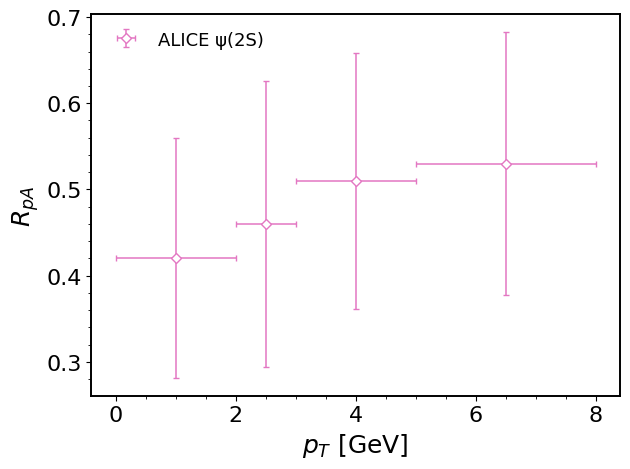

In [ ]:
# What did we load, by state and rapidity?
print(exp_rpa.groupby(["state","ylo","yhi"]).size())

# Show the ψ(2S) rows (should be 4 points at 2.03–3.53)
psi2s = exp_rpa.query("state=='psi_2S'")
print(psi2s)

# Sanity-plot the ψ(2S) points alone
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
overlay_exp_pts_vs_pt(ax, psi2s, state="psi_2S", label="ALICE ψ(2S)", marker="D")
ax.set_xlabel(r"$p_T$ [GeV]"); ax.set_ylabel(r"$R_{pA}$"); ax.legend(frameon=False); ax.minorticks_on()
plt.show()

In [ ]:
sub = select_exp_by_ywindow(exp_rpa, "psi_2S", Y_FWD, tol=5e-3)
overlay_exp_pts_vs_pt(ax, sub, state="psi_2S", label=("ALICE" if not sub.empty else None), marker="D")

<Axes: xlabel='$p_T$ [GeV]', ylabel='$R_{pA}$'>

### Combine Theory with Experimental Data

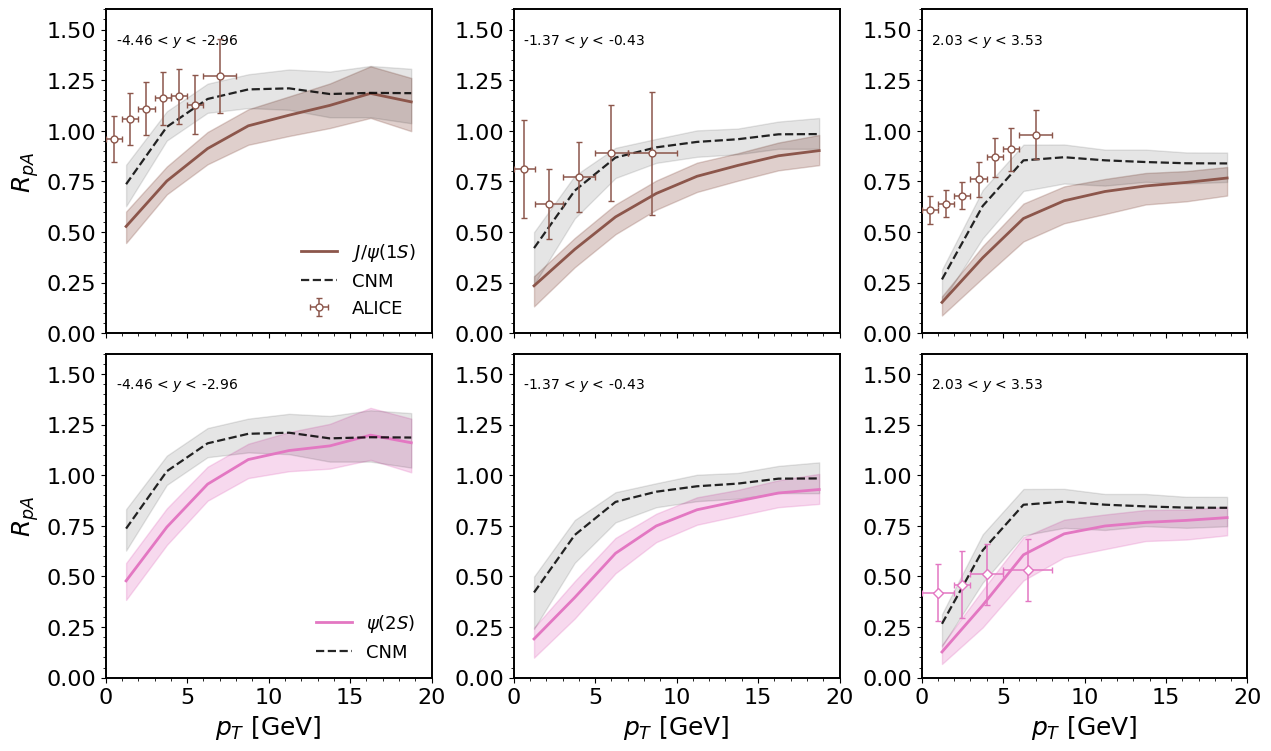

In [ ]:
SHOW_CNM = True
# -------------------- RpA(pT): 2x3 grid (J/ψ top, ψ(2S) bottom) ----------------
fig, axes = plt.subplots(2, 3, figsize=(12.6, 7.4), sharex=True, sharey=True, constrained_layout=True)

for j, yw in enumerate(Y_WINDOWS):
    # --- J/ψ(1S) ---
    ax = axes[0, j]
    col = STATE_COLORS["jpsi_1S"]; df_th = th_pt["jpsi_1S"][yw]
    ax.fill_between(df_th["pt"], df_th["lo"], df_th["hi"], color=col, alpha=BAND_ALPHA["Total"])
    ax.plot(df_th["pt"], df_th["c"], color=col, lw=2.0, label=PRETTY_STATE["jpsi_1S"])
    if SHOW_CNM:
        df_cnm = cnm_band_vs_pt_integrated_over_centrality(C5, yw, PTB)
        ax.fill_between(df_cnm["pt"], df_cnm["lo"], df_cnm["hi"], color="k", alpha=0.10, zorder=1)
        ax.plot(df_cnm["pt"], df_cnm["c"], ls="--", lw=1.6, color="k", alpha=0.85, label="CNM", zorder=2)
    sub = select_exp_by_ywindow(exp_rpa, "jpsi_1S", yw, tol=5e-3)
    overlay_exp_pts_vs_pt(ax, sub, state="jpsi_1S", label="ALICE", marker="o")

    ax.text(0.03, 0.93, rf"{yw[0]:.2f} < $y$ < {yw[1]:.2f}", transform=ax.transAxes, ha="left", va="top", fontsize=10)
    ax.set_xlim(0,20); ax.set_ylim(0.0,1.6); ax.minorticks_on()
    ax.tick_params(axis="y", labelleft=True)
    if j == 0:
        ax.set_ylabel(r"$R_{pA}$")
        _legend_if_any(ax, loc="lower right")

    # --- ψ(2S) ---
    ax = axes[1, j]
    col = STATE_COLORS["psi_2S"]; df_th = th_pt["psi_2S"][yw]
    ax.fill_between(df_th["pt"], df_th["lo"], df_th["hi"], color=col, alpha=BAND_ALPHA["Total"])
    ax.plot(df_th["pt"], df_th["c"], color=col, lw=2.0, label=PRETTY_STATE["psi_2S"])
    if SHOW_CNM:
        df_cnm = cnm_band_vs_pt_integrated_over_centrality(C5, yw, PTB)
        ax.fill_between(df_cnm["pt"], df_cnm["lo"], df_cnm["hi"], color="k", alpha=0.10, zorder=1)
        ax.plot(df_cnm["pt"], df_cnm["c"], ls="--", lw=1.6, color="k", alpha=0.85, label="CNM", zorder=2)
    sub = select_exp_by_ywindow(exp_rpa, "psi_2S", yw, tol=5e-3)   # forward will have points
    overlay_exp_pts_vs_pt(ax, sub, state="psi_2S", label=("ALICE" if not sub.empty else None), marker="D")

    ax.text(0.03, 0.93, rf"{yw[0]:.2f} < $y$ < {yw[1]:.2f}", transform=ax.transAxes, ha="left", va="top", fontsize=10)
    ax.set_xlim(0,20); ax.set_ylim(0.0,1.6); ax.minorticks_on()
    ax.tick_params(axis="y", labelleft=True)
    if j == 0:
        ax.set_ylabel(r"$R_{pA}$")
        _legend_if_any(ax, loc="lower right")
    ax.set_xlabel(r"$p_T$ [GeV]")

plt.savefig(f"{outPath}/rpa_vs_pt_Jpsi_Psi2S_2x3_theory_plus_ALICE.pdf", bbox_inches="tight", dpi=300)
plt.show()

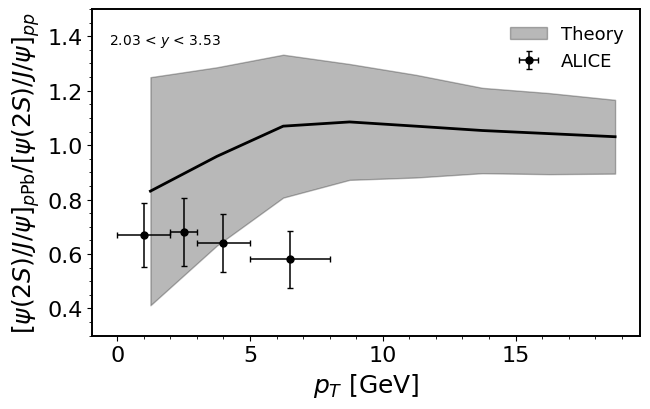

In [ ]:
# --------------------------- Double ratio (forward) ----------------------------
dr_th = th_dr
fig, ax = plt.subplots(figsize=(6.6, 4.2))
ax.fill_between(dr_th["pt"], dr_th["lo"], dr_th["hi"], color="black", alpha=0.28, label="Theory")
ax.plot(dr_th["pt"], dr_th["c"], color="black", lw=2.0)
sub = select_exp_by_ywindow(exp_dr, "psi_2S_over_jpsi_1S", Y_FWD, tol=5e-3)
if not sub.empty:
    x = sub["pt"].to_numpy(float)
    xerr = np.vstack([x - sub["ptlo"].to_numpy(float), sub["pthi"].to_numpy(float) - x])
    y = sub["val"].to_numpy(float); yerr = sub["dtot"].to_numpy(float)
    ax.errorbar(x, y, xerr=xerr, yerr=yerr, fmt="o", mfc="black", mec="black",
                ecolor="black", color="black", capsize=2.5, lw=1.1, ms=5, label="ALICE", zorder=5)
ax.text(0.03, 0.93, rf"{Y_FWD[0]:.2f} < $y$ < {Y_FWD[1]:.2f}", transform=ax.transAxes, ha="left", va="top", fontsize=10)
ax.set_xlabel(r"$p_T$ [GeV]")
ax.set_ylabel(r"$[\psi(2S)/J/\psi]_{p\mathrm{Pb}}/[\psi(2S)/J/\psi]_{pp}$")
ax.set_ylim(0.3, 1.5); ax.minorticks_on(); ax.legend(frameon=False, loc="best")
plt.tight_layout(); plt.savefig(f"{outPath}/double_ratio_vs_pt_theory_plus_ALICE.pdf", bbox_inches="tight", dpi=300); plt.show()

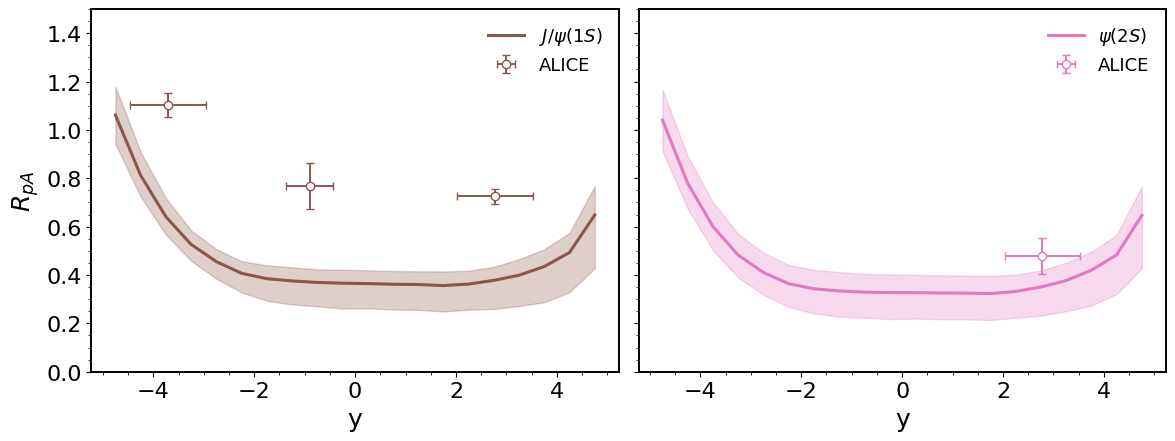

In [ ]:
exp_as_y = exp_build_RpA_vs_y_from_pt(exp_rpa)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.0, 4.6), sharey=True)
for st, ax in zip(["jpsi_1S","psi_2S"], [ax1, ax2]):
    col = STATE_COLORS[st]; df = th_y[st]
    ax.fill_between(df["y"], df["lo"], df["hi"], color=col, alpha=BAND_ALPHA["Total"])
    ax.plot(df["y"], df["c"], color=col, lw=2.2, label=PRETTY_STATE[st])
    sub = exp_as_y.query("state==@st")
    if not sub.empty:
        x = sub["y"].to_numpy(float); y = sub["val"].to_numpy(float)
        xerr = np.vstack([x - sub["ylo"].to_numpy(float), sub["yhi"].to_numpy(float) - x])
        yerr = sub["dtot"].to_numpy(float)
        ax.errorbar(x, y, xerr=xerr, yerr=yerr, fmt="o", mfc="white", mec=col, ecolor=col, color=col,
                    capsize=3.0, lw=1.4, ms=6, label="ALICE", zorder=5)
    ax.set_xlabel("y"); ax.minorticks_on(); ax.set_ylim(0.0, 1.5); ax.legend(frameon=False, loc="best")
ax1.set_ylabel(r"$R_{pA}$")
plt.tight_layout(); plt.savefig(f"{outPath}/rpa_vs_y_theory_plus_ALICE_two_panels.pdf", bbox_inches="tight", dpi=300); plt.show()


#### RpA vs $p_T$

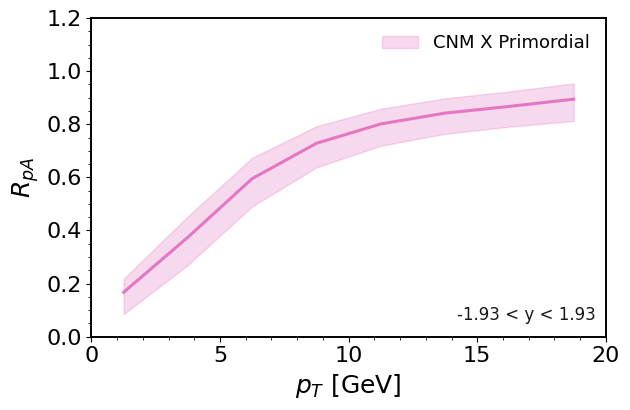

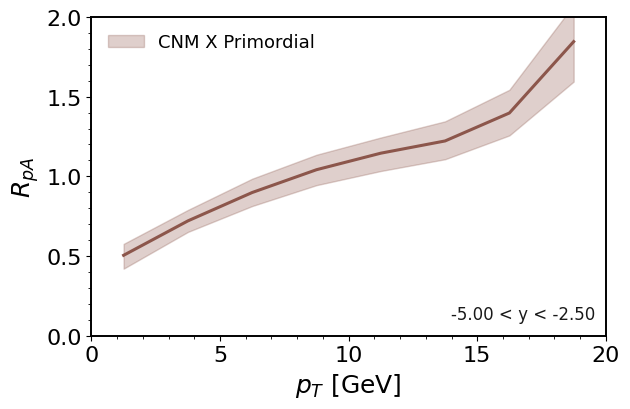

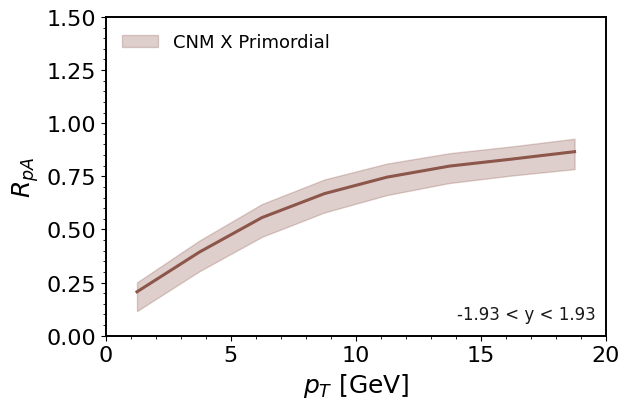

,pt,c,lo,hi
0,1.25,0.206688,0.116085,0.250913
1,3.75,0.393794,0.303788,0.448094
2,6.25,0.556133,0.465461,0.619822
3,8.75,0.668880,0.580202,0.735457
4,11.25,0.746345,0.661983,0.810178
5,13.75,0.798330,0.718755,0.858986
6,16.25,0.831414,0.754130,0.891053
7,18.75,0.866158,0.784067,0.927001


In [ ]:
# RpA(pT) integrated over centralities at a chosen rapidity window
C5.total_vs_pt_integrated_over_centrality(
    y_window=(-1.93, 1.93), pt_bins=PT_BINS_2P5, state="psi_2S",
    plot=True, legend_loc="upper right", note_loc="lower right",
    xlim=(0.0, 20.0), ylim=(0.0, 1.2),
    save=f"{outPath}/fig_Total_vs_pt_integrated_mid_psi2S.pdf"
)

# RpA(pT) integrated over centralities at a chosen rapidity window
C5.total_vs_pt_integrated_over_centrality(
    y_window=(-5, -2.5),
    pt_bins=PT_BINS_2P5,
    state="jpsi_1S",
    plot=True,
    legend_loc="upper left",     # place legend inside the plot
    note_loc="lower right",      # place the y-range note inside
    xlim=(0.0, 20.0),
    ylim=(0.0, 2.0),
    save=f"{outPath}/fig_Total_vs_pt_integrated_back_1S.pdf"
)

# RpA(pT) integrated over centralities at a chosen rapidity window
C5.total_vs_pt_integrated_over_centrality(
    y_window=(-1.93, 1.93),
    pt_bins=PT_BINS_2P5,
    state="jpsi_1S",
    plot=True,
    legend_loc="upper left",     # place legend inside the plot
    note_loc="lower right",      # place the y-range note inside
    xlim=(0.0, 20.0),
    ylim=(0.0, 1.5),
    save=f"{outPath}/fig_Total_vs_pt_integrated_mid.pdf"
)

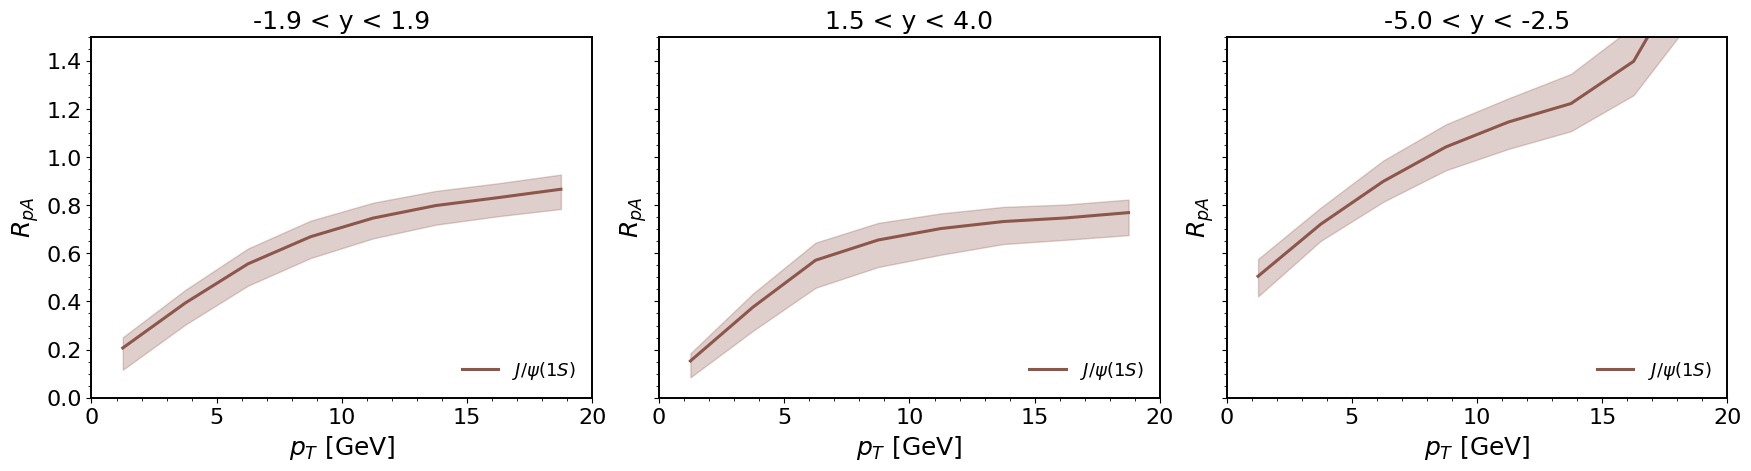

In [ ]:
# --- E2) Centrality-integrated RpA(pT) subfigs: ALL states × 3 y-windows ---
ywins = [(-1.93, 1.93), (1.5, 4.0), (-5.0, -2.5)]
pt_bins = [(i, i+2.5) for i in np.arange(0.0, 20.0, 2.5)]
C5.plot_total_vs_pt_integrated_subfigs_all_states(
    states=["jpsi_1S"],
    y_windows=ywins, pt_bins=pt_bins,
    ncols=3, xlim=(0.0, 20.0), ylim=(0.0, 1.5),
    legend_loc="lower right",
    save=f"{outPath}/fig_Total_vs_pt_integrated_allstates.pdf",
)

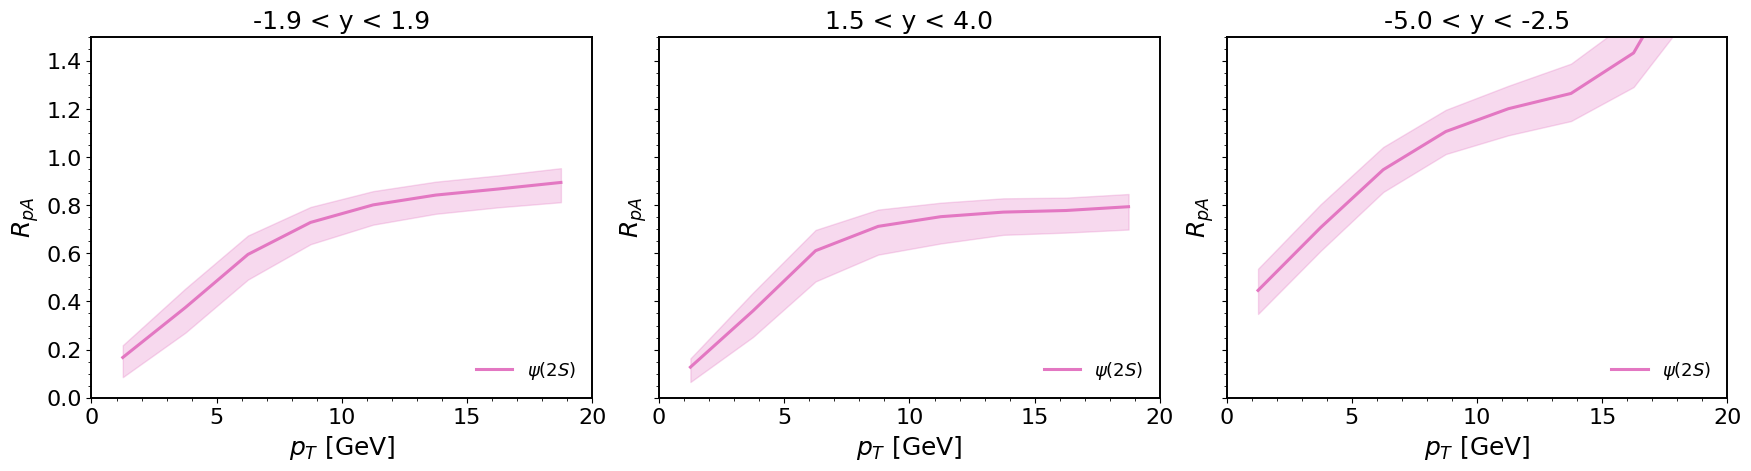

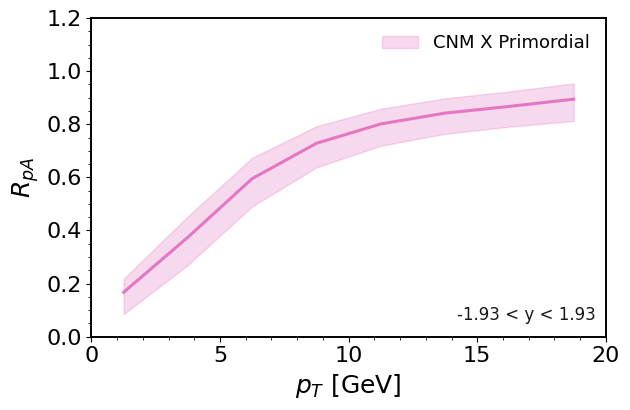

,pt,c,lo,hi
0,1.25,0.167256,0.085413,0.218056
1,3.75,0.374718,0.270257,0.453511
2,6.25,0.595388,0.490817,0.673833
3,8.75,0.728301,0.637866,0.792471
4,11.25,0.801135,0.718902,0.858245
5,13.75,0.841875,0.764125,0.897537
6,16.25,0.867177,0.790984,0.923559
7,18.75,0.894375,0.812215,0.953639


In [ ]:
# --- E2) Centrality-integrated RpA(pT) subfigs: ALL states × 3 y-windows ---
ywins = [(-1.93, 1.93), (1.5, 4.0), (-5.0, -2.5)]
pt_bins = [(i, i+2.5) for i in np.arange(0.0, 20.0, 2.5)]
C5.plot_total_vs_pt_integrated_subfigs_all_states(
    states=["psi_2S"],
    y_windows=ywins, pt_bins=pt_bins,
    ncols=3, xlim=(0.0, 20.0), ylim=(0.0, 1.5),
    legend_loc="lower right",
    save=f"{outPath}/fig_Total_vs_pt_integrated_2S.pdf",
)

# --- (optional) Standalone one-liner using the new integrated pT function with in-plot note ---
C5.total_vs_pt_integrated_over_centrality(
    y_window=(-1.93, 1.93), pt_bins=PT_BINS_2P5, state="psi_2S",
    plot=True, legend_loc="upper right", note_loc="lower right",
    xlim=(0.0, 20.0), ylim=(0.0, 1.2),
    save=f"{outPath}/fig_Total_vs_pt_integrated_mid_psi2S.pdf"
)

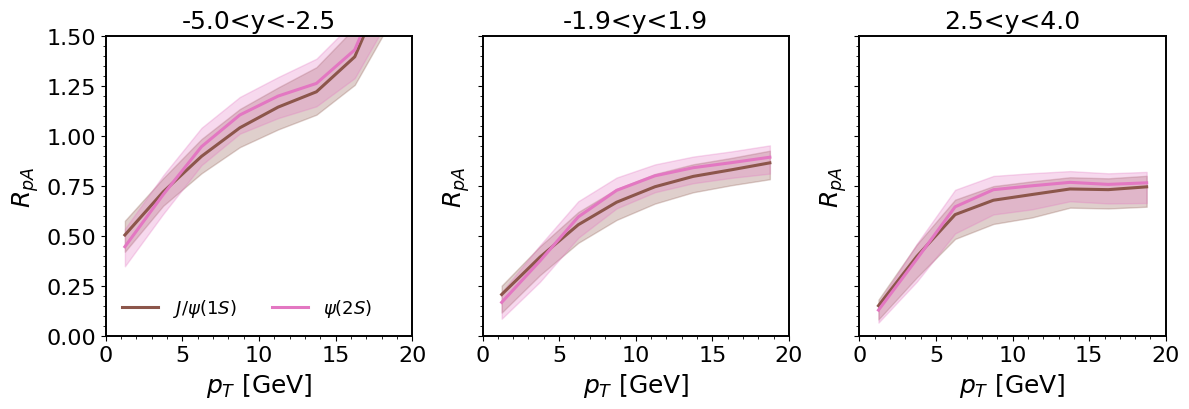

FileNotFoundError: [Errno 2] No such file or directory: 'output-5.02/output-5.02/fig_Total_vs_pT_subfigs.pdf'

<Figure size 640x480 with 0 Axes>

In [ ]:
Y_WINDOWS = [(-5.0,-2.5), (-1.93,1.93), (2.5,4.0)]
PT_BINS   = [(i, i+2.5) for i in np.arange(0.0, 20.0, 2.5)]

fig, axes = plt.subplots(1, 3, figsize=(12.0, 4.2), sharey=True)
for ax, yw in zip(axes, Y_WINDOWS):
    for st in ["jpsi_1S", "psi_2S"]:
        df = C5.total_vs_pt_integrated_over_centrality(yw, PT_BINS, st, plot=False)
        col = STATE_COLORS.get(st)
        ax.fill_between(df["pt"], df["lo"], df["hi"], alpha=BAND_ALPHA["Total"], color=col)
        ax.plot(df["pt"], df["c"], lw=2.2, color=col, label=PRETTY_STATE.get(st, st))
    ax.set_title(f"{yw[0]:.1f}<y<{yw[1]:.1f}")
    ax.set_xlabel(r"$p_T$ [GeV]"); ax.set_ylabel(r"$R_{pA}$")
    ax.minorticks_on(); ax.set_xlim(0, 20); ax.set_ylim(0.0, 1.5)
axes[0].legend(frameon=False, ncol=2)
plt.tight_layout()
plt.show()
plt.savefig(f"{outPath}/output-5.02/fig_Total_vs_pT_subfigs.pdf", bbox_inches="tight")

#### RpA vs Rapidity

In [ ]:
# THEORY
YBINS_05 = [(y, y+0.5) for y in np.arange(-5.0, 5.0, 0.5)]
tot_y_1S = C5.total_vs_y_integrated_over_centrality(YBINS_05, pt_range=(0.0, 20.0), state="jpsi_1S")
tot_y_2S = C5.total_vs_y_integrated_over_centrality(YBINS_05, pt_range=(0.0, 20.0), state="psi_2S")

In [ ]:
# E) Centrality-integrated summary curves (no NameError now because we import BAND_ALPHA)
# RpA(y) integrated over centralities (equal weights)
YBINS_05 = [(y, y+0.5) for y in np.arange(-5.0, 5.0, 0.5)]
tot_y = C5.total_vs_y_integrated_over_centrality(YBINS_05, pt_range=(0.0, 20.0), state="jpsi_1S")
fig, ax = plt.subplots(figsize=(6.4, 4.2))
ax.fill_between(tot_y["y"], tot_y["lo"], tot_y["hi"], alpha=BAND_ALPHA["Total"], color=STATE_COLORS["jpsi_1S"])
ax.plot(tot_y["y"], tot_y["c"], lw=2.2, color=STATE_COLORS["jpsi_1S"], label=f"Total × {PRETTY_STATE['jpsi_1S']}")
ax.set_xlabel("y"); ax.set_ylabel(r"$R_{pA}$"); ax.minorticks_on(); ax.legend(frameon=False); ax.set_ylim(0.0, 1.5)
plt.tight_layout(); plt.savefig(f"{outPath}/fig_Total_vs_y_integrated.pdf", bbox_inches="tight")

In [ ]:
YBINS_05 = [(y, y+0.5) for y in np.arange(-5.0, 5.0, 0.5)]
C5.plot_total_vs_y_integrated_all_states(
    states=["jpsi_1S","psi_2S","chicJ_1P"],
    y_bins=YBINS_05,
    pt_range=(0.0, 20.0),
    ylim=(0.0, 1.2),
    legend_loc="upper right",
    note="p+Pb 5.02 TeV",
    save=f"{outPath}/fig_Total_vs_y_integrated_ALL.pdf",
)